In [1]:
# load dataset (student Portuguese scores)
import pandas as pd
d = pd.read_csv('student-por.csv', sep=';')
len(d)

649

In [2]:
# generate binary label (pass/fail) based on G1+G2+G3 (test grades, each 0-20 pts); threshold for passing is sum>=30
d['pass'] = d.apply(lambda row: 1 if (row['G1']+row['G2']+row['G3']) >= 35 else 0, axis=1)
d = d.drop(['G1', 'G2', 'G3'], axis=1)
d.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,internet,romantic,famrel,freetime,goout,Dalc,Walc,health,absences,pass
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,no,no,4,3,4,1,1,3,4,0
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,yes,no,5,3,3,1,1,3,2,0
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,yes,no,4,3,2,2,3,3,6,1
3,GP,F,15,U,GT3,T,4,2,health,services,...,yes,yes,3,2,2,1,1,5,0,1
4,GP,F,16,U,GT3,T,3,3,other,other,...,no,no,4,3,2,1,2,5,0,1


In [3]:
# use one-hot encoding on categorical columns
d = pd.get_dummies(d, columns=['sex', 'school', 'address', 'famsize', 'Pstatus', 'Mjob', 'Fjob', 
                               'reason', 'guardian', 'schoolsup', 'famsup', 'paid', 'activities',
                               'nursery', 'higher', 'internet', 'romantic'])
d.head()

,age,Medu,Fedu,traveltime,studytime,failures,famrel,freetime,goout,Dalc,...,activities_no,activities_yes,nursery_no,nursery_yes,higher_no,higher_yes,internet_no,internet_yes,romantic_no,romantic_yes
0,18,4,4,2,2,0,4,3,4,1,...,1,0,0,1,0,1,1,0,1,0
1,17,1,1,1,2,0,5,3,3,1,...,1,0,1,0,0,1,0,1,1,0
2,15,1,1,1,2,0,4,3,2,2,...,1,0,0,1,0,1,0,1,1,0
3,15,4,2,1,3,0,3,2,2,1,...,0,1,0,1,0,1,0,1,0,1
4,16,3,3,1,2,0,4,3,2,1,...,1,0,0,1,0,1,1,0,1,0


In [4]:
# shuffle rows
d = d.sample(frac=1)
# split training and testing data
d_train = d[:500]
d_test = d[500:]

d_train_att = d_train.drop(['pass'], axis=1)
d_train_pass = d_train['pass']

d_test_att = d_test.drop(['pass'], axis=1)
d_test_pass = d_test['pass']

d_att = d.drop(['pass'], axis=1)
d_pass = d['pass']

# number of passing students in whole dataset:
import numpy as np
print("Passing: %d out of %d (%.2f%%)" % (np.sum(d_pass), len(d_pass), 100*float(np.sum(d_pass)) / len(d_pass)))

Passing: 328 out of 649 (50.54%)


In [5]:
# fit a decision tree
from sklearn import tree
t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=5)
t = t.fit(d_train_att, d_train_pass)

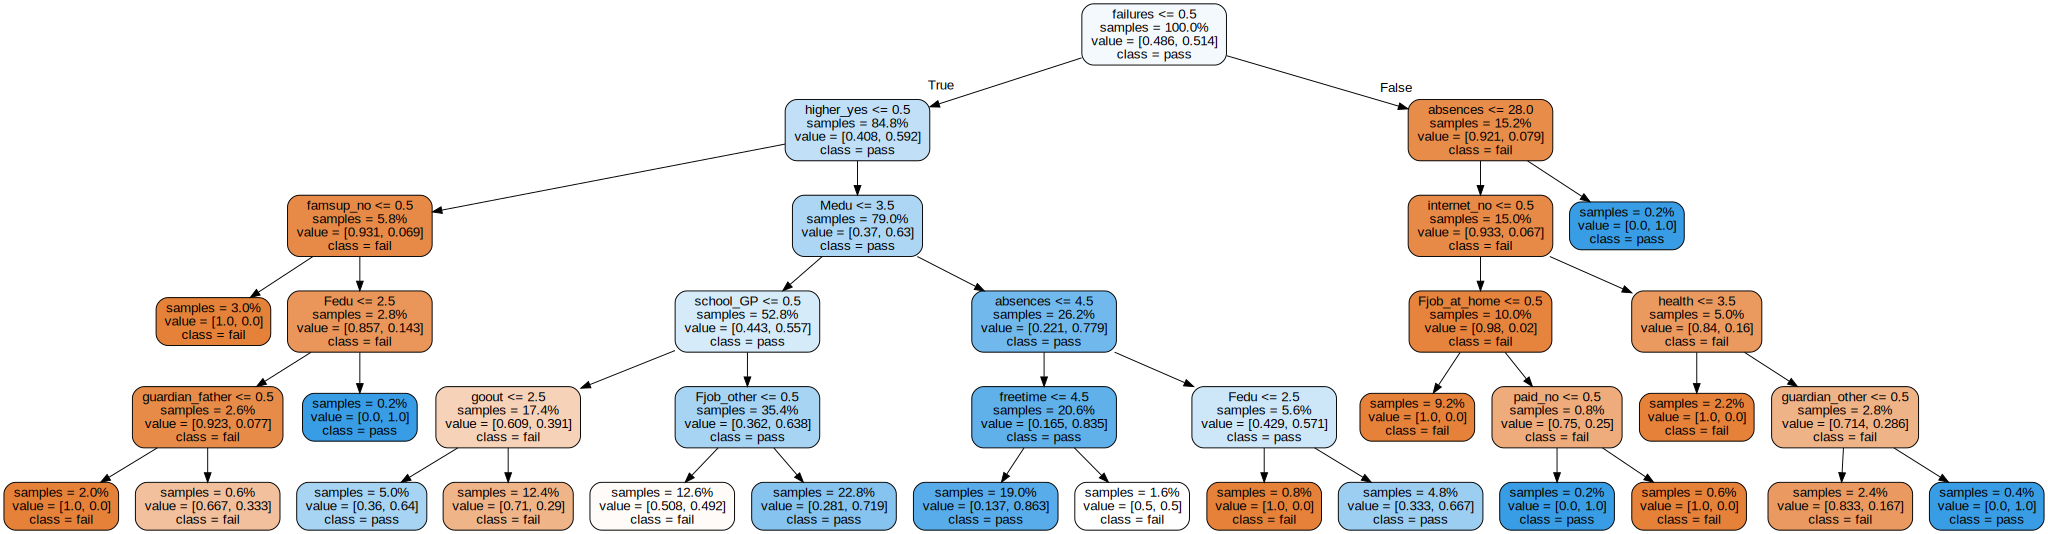

In [6]:
# visualize tree
import graphviz
dot_data = tree.export_graphviz(t, out_file=None, label="all", impurity=False, proportion=True,
                                feature_names=list(d_train_att), class_names=["fail", "pass"], 
                                filled=True, rounded=True)
graph = graphviz.Source(dot_data)
graph

In [7]:
# save tree
tree.export_graphviz(t, out_file="student-performance.dot", label="all", impurity=False, proportion=True,
                     feature_names=list(d_train_att), class_names=["fail", "pass"], 
                     filled=True, rounded=True)

In [8]:
t.score(d_test_att, d_test_pass)

0.59731543624161076

In [9]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(t, d_att, d_pass, cv=5)
# show average score and +/- two standard deviations away (covering 95% of scores)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.67 (+/- 0.06)


In [10]:
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    print("Max depth: %d, Accuracy: %0.2f (+/- %0.2f)" % (max_depth, scores.mean(), scores.std() * 2))

Max depth: 1, Accuracy: 0.64 (+/- 0.05)
Max depth: 2, Accuracy: 0.69 (+/- 0.08)
Max depth: 3, Accuracy: 0.69 (+/- 0.09)
Max depth: 4, Accuracy: 0.66 (+/- 0.10)
Max depth: 5, Accuracy: 0.67 (+/- 0.06)
Max depth: 6, Accuracy: 0.64 (+/- 0.08)
Max depth: 7, Accuracy: 0.67 (+/- 0.02)
Max depth: 8, Accuracy: 0.67 (+/- 0.07)
Max depth: 9, Accuracy: 0.67 (+/- 0.06)
Max depth: 10, Accuracy: 0.63 (+/- 0.12)
Max depth: 11, Accuracy: 0.65 (+/- 0.07)
Max depth: 12, Accuracy: 0.63 (+/- 0.07)
Max depth: 13, Accuracy: 0.63 (+/- 0.07)
Max depth: 14, Accuracy: 0.63 (+/- 0.08)
Max depth: 15, Accuracy: 0.64 (+/- 0.06)
Max depth: 16, Accuracy: 0.62 (+/- 0.05)
Max depth: 17, Accuracy: 0.64 (+/- 0.09)
Max depth: 18, Accuracy: 0.63 (+/- 0.08)
Max depth: 19, Accuracy: 0.63 (+/- 0.06)


In [11]:
depth_acc = np.empty((19,3), float)
i = 0
for max_depth in range(1, 20):
    t = tree.DecisionTreeClassifier(criterion="entropy", max_depth=max_depth)
    scores = cross_val_score(t, d_att, d_pass, cv=5)
    depth_acc[i,0] = max_depth
    depth_acc[i,1] = scores.mean()
    depth_acc[i,2] = scores.std() * 2
    i += 1
    
depth_acc

array([[  1.        ,   0.63790456,   0.04848398],
       [  2.        ,   0.68559869,   0.07148267],
       [  3.        ,   0.68710174,   0.0865951 ],
       [  4.        ,   0.6669467 ,   0.10726248],
       [  5.        ,   0.66261518,   0.05307124],
       [  6.        ,   0.65018859,   0.07040891],
       [  7.        ,   0.66564494,   0.02029519],
       [  8.        ,   0.67474598,   0.05984916],
       [  9.        ,   0.6640118 ,   0.03746891],
       [ 10.        ,   0.6346137 ,   0.09657669],
       [ 11.        ,   0.6484015 ,   0.10475147],
       [ 12.        ,   0.64545485,   0.05529647],
       [ 13.        ,   0.64544256,   0.08167465],
       [ 14.        ,   0.6346614 ,   0.07458128],
       [ 15.        ,   0.63463773,   0.08162646],
       [ 16.        ,   0.62853141,   0.05926906],
       [ 17.        ,   0.63622335,   0.05390067],
       [ 18.        ,   0.62548936,   0.06050112],
       [ 19.        ,   0.63004547,   0.07022296]])

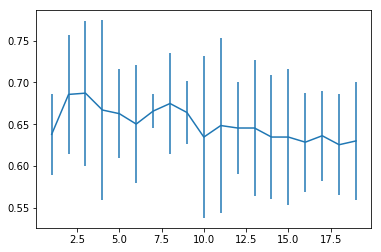

In [12]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
ax.errorbar(depth_acc[:,0], depth_acc[:,1], yerr=depth_acc[:,2])
plt.show()